
    Yudha Cipta M. Y.
    Hacktiv8 - Batch 01
   

## About this dataset

The dataset consists of data customer churn of Telco which focused on customer retention program. The main goal of this project is to predict behavior to retain customer.

this dataset originated from ucL : https://www.kaggle.com/blastchar/telco-customer-churn

### Attribute Information:
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.
Column Descriptions:
- Customers who left within the last month – the column is called Churn.

- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.

- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges.

- Demographic info about customers – gender, age range, and if they have partners and dependents.

1. customerID : A unique ID that identifies each customer.
2. gender : The customer’s gender: Male, Female.
3. SeniorCitizen: indicates if the customer is 65 or older: Yes, No
4. Partner : Indicates if the customer is married: Yes, No
5. Dependents : Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
6. Tenure: Indicates the total amount of months that the customer has been with the company.
7. PhoneService : Indicates if the customer subscribes to home phone service with the company: Yes, No
8. MultipleLines : Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No
9. InternetService : Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.
10. OnlineSecurity : Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No
 
11. OnlineBackup : Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No.

12. DeviceProtection  Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

13. TechSupport        Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

14. Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

15. Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.
16. Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

17. Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No

18. Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

19. Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.

20. Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

21. Churn : customer status Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

### import library

In [38]:
#Data exploration
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import scipy.stats as st

#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

#ML
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.preprocessing import LabelEncoder
import time
from sklearn.metrics import r2_score, accuracy_score, roc_auc_score, mean_squared_error
from sklearn.pipeline import Pipeline 
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow import keras
import os
import tensorflow_datasets as tfds

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Data Loading

In [2]:

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(df.shape)
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Data Cleaning

In [6]:
df.duplicated().any()

False

In [7]:
df.isnull().values.any()

False

In [8]:
df.isnull().sum().sort_values(ascending=False)

customerID          0
DeviceProtection    0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
OnlineBackup        0
gender              0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
SeniorCitizen       0
Churn               0
dtype: int64

fortunately there are no missing value

In [9]:
df.drop('customerID',axis='columns',inplace=True)

In [10]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
for column in df:
    print(df[column].unique())

['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
['No' 'Yes']


In [12]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('O')

In [13]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
df["TotalCharges"].fillna(df["TotalCharges"].mean(), inplace=True)

In [15]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
num_col=df[df.describe().columns.values]
cat_col=df.drop(columns=df.describe().columns.values)

### Data Exploration

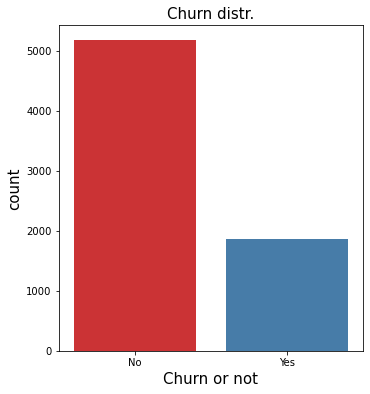

In [17]:
plt.rcParams['figure.figsize'] = (12, 6)

plt.subplot(1, 2, 1)
sns.countplot(df['Churn'], palette = 'Set1')
plt.title('Churn distr.', fontsize = 15)
plt.xlabel('Churn or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

In [18]:
df['Churn'].value_counts(normalize = True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

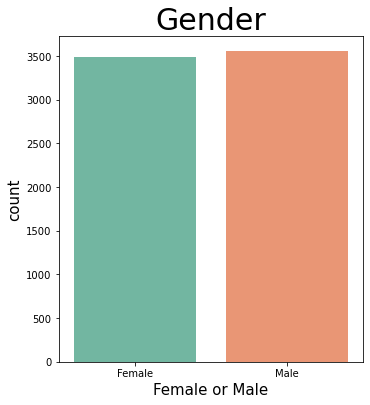

In [19]:
#checking the Distribution of gender in dataset

plt.rcParams['figure.figsize'] = (12,6)
plt.subplot(1, 2, 2)
sns.countplot(df['gender'], palette = 'Set2')
plt.title('Gender', fontsize = 30)
plt.xlabel('Female or Male', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()

In [20]:
df['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

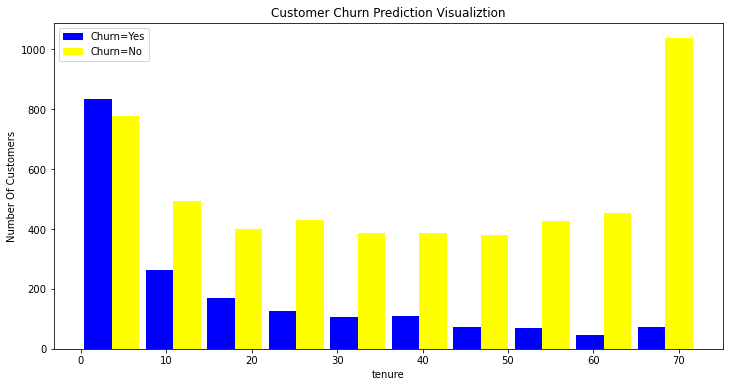

In [21]:
tenure_churn_no = df[df.Churn=='No'].tenure
tenure_churn_yes = df[df.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.9, color=['blue','yellow'],label=['Churn=Yes','Churn=No'])
plt.legend()

Text(0.5, 1.0, 'Churn based on tenure')

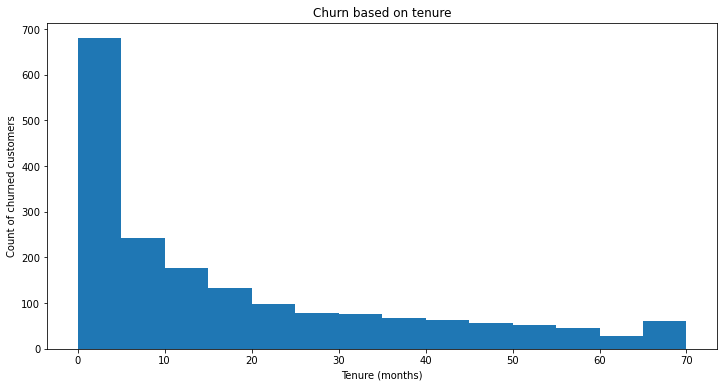

In [22]:
filt = df['Churn']=='Yes'
bins = np.arange(0,75, 5)

plt.hist(df[filt]['tenure'], bins = bins)
plt.xlabel('Tenure (months)')
plt.ylabel('Count of churned customers')
plt.title('Churn based on tenure')

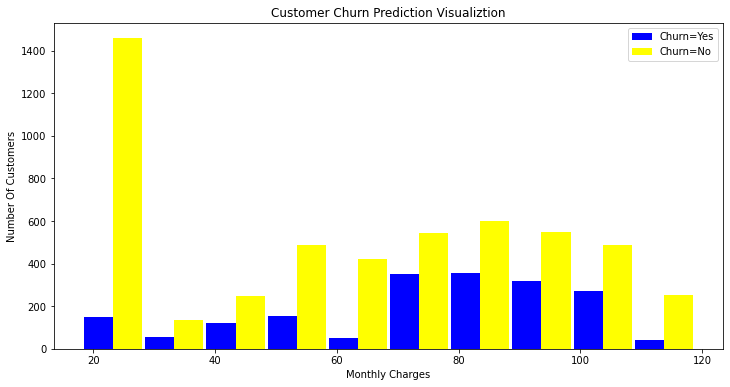

In [23]:
mc_churn_no = df[df.Churn=='No'].MonthlyCharges      
mc_churn_yes = df[df.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['blue','yellow'],label=['Churn=Yes','Churn=No'])
plt.legend()

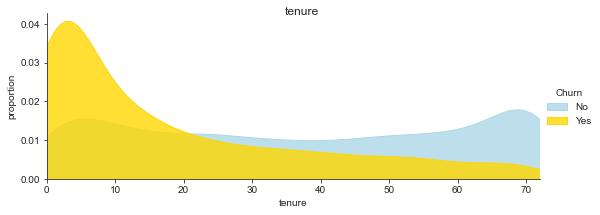

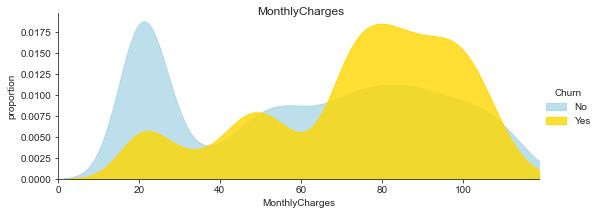

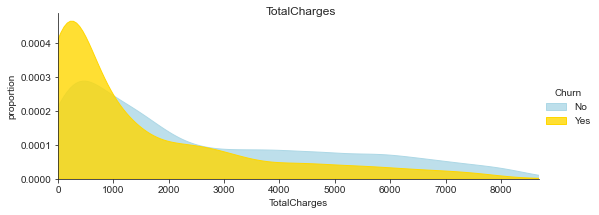

In [24]:
def plot_distribution_num(df_select) : 
    sns.set_style("ticks")
    s = sns.FacetGrid(df, hue = 'Churn',aspect = 2.5, palette ={'No' : 'lightblue', 'Yes' : 'gold'})
    s.map(sns.kdeplot, df_select, shade = True, alpha = 0.8)
    s.set(xlim=(0, df[df_select].max()))
    s.add_legend()
    s.set_axis_labels(df_select, 'proportion')
    s.fig.suptitle(df_select)
    plt.show()
    
plot_distribution_num('tenure')
plot_distribution_num('MonthlyCharges')
plot_distribution_num('TotalCharges')

In [25]:

#To indicate how many services each customer signed up for (Phone, Streaming Tv/Movies, Internet)

isY = lambda x:int(x == 'Yes' or x=='DSL' or x=='Fiber optic')
countFactors = lambda row: isY(row['PhoneService']) + isY(row['StreamingMovies']) + isY(row['InternetService']) + isY(row['StreamingTV'])
                               
df['Services'] = df.apply(countFactors, axis = 1)
df[['PhoneService', 'StreamingMovies', 'InternetService','StreamingTV','Churn','Services']].head(10)

,PhoneService,StreamingMovies,InternetService,StreamingTV,Churn,Services
0,No,No,DSL,No,No,1
1,Yes,No,DSL,No,No,2
2,Yes,No,DSL,No,Yes,2
3,No,No,DSL,No,No,1
4,Yes,No,Fiber optic,No,Yes,2
5,Yes,Yes,Fiber optic,Yes,Yes,4
6,Yes,No,Fiber optic,Yes,No,3
7,No,No,DSL,No,No,1
8,Yes,Yes,Fiber optic,Yes,Yes,4
9,Yes,No,DSL,No,No,2


In [91]:
eda=df
eda['Churn'].replace(to_replace='Yes', value=1, inplace=True)
eda['Churn'].replace(to_replace='No',  value=0, inplace=True)

eda['SeniorCitizen'] = eda['SeniorCitizen'].apply(lambda x: 'Yes' if x == 1 else 'No')
df1=pd.get_dummies(eda)
df1.head()

,tenure,MonthlyCharges,TotalCharges,Churn,Services,gender_Female,gender_Male,SeniorCitizen_No,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,2,0,1,1,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,2,0,1,1,1,0,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,1,0,1,1,1,0,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,2,1,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0


In [105]:
uniq=df.nunique()
ord_cols=uniq[uniq==3].index
for col in ord_cols:
    print(df[col].unique())

['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']


Dari data diatas dapat dilihat bahwa kolom 'Contract' dan 'InternetService' memiliki unique values yang berbeda. Attribut dari 'No internet service' dapat dimasukkan sebagai variabel 'No', tetapi untuk kali ini akan digunakan dummy variable agar tidak terjadi kebocoran data.

<AxesSubplot:>

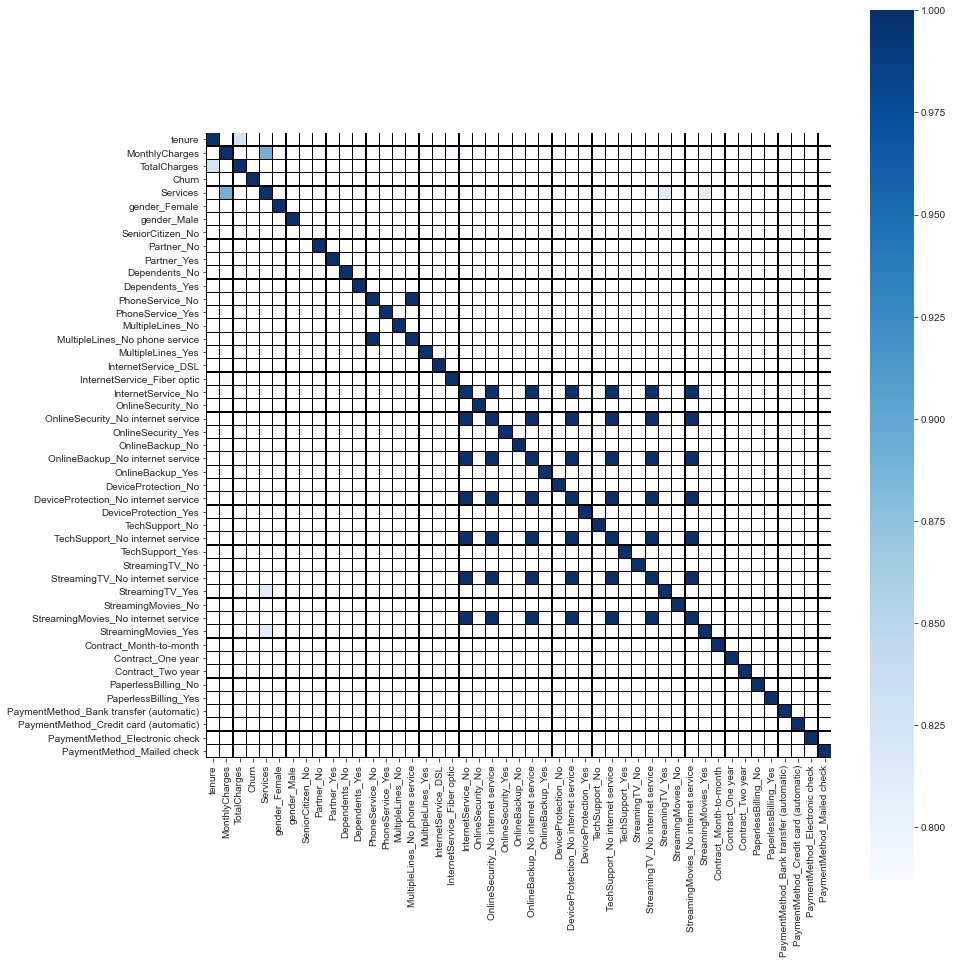

In [92]:
corre=df1.corr()
f, ax = plt.subplots(figsize=(14,16))
sns.heatmap(corre,mask=corre<0.75,linewidth=0.25,cmap="Blues",linecolor='Black', square=True)

Dari grafik korelasi diatas dapat dilihat bahwa
1. korelasi antara Monthly charges dan Fiber optic menunjukkan bahwa internet dengan fiber optic merupakan layanan yang mahal, oleh karena itu merupakan salah satu penyebab 'Churn'.
2. Total Charges dan Tenure/Jangka Waktu terlihat semakin banyak tahun pelanggan berlangganan layanan, maka semakin banyak pula total charges/biaya yang harus dikeluarkan.
3. 'No internet service' dan 'No phone service' berkorelasi di berbagai variabel. Ini dapat digunakan untuk membentuk fitur terpisah. Namun dalam distribusi dapat dilihat bahwa point/titik data cenderung sedikit dan bisa menyebabkan matriks menjadi jarang.

<AxesSubplot:>

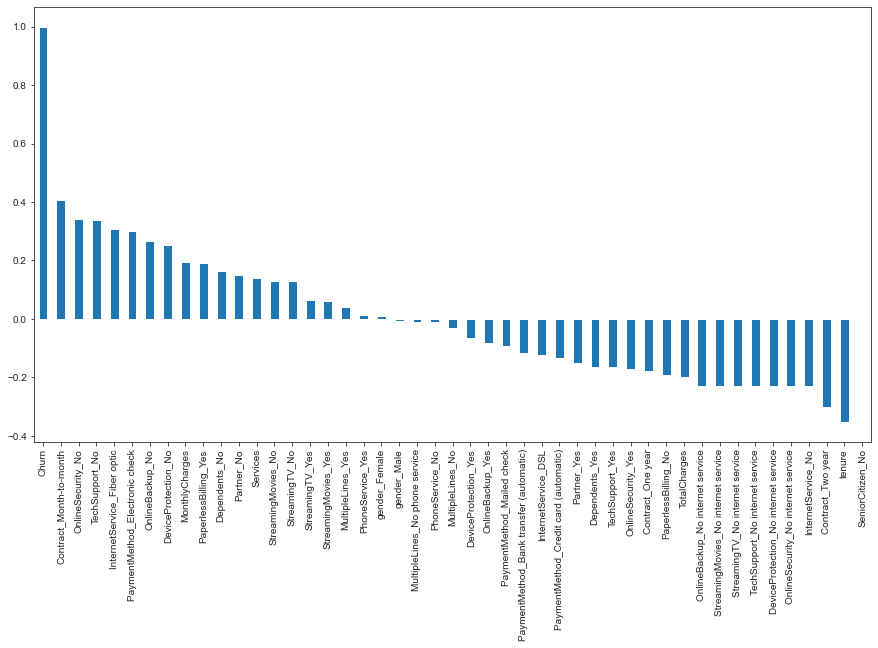

In [93]:
plt.figure(figsize=(15,8))
df1.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [94]:
uniq=df.nunique()
cat_cols=uniq[uniq<5].index
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in df.columns:
    if df[i].dtype in numeric_dtypes:
        numeric.append(i)
numeric,cat_cols

(['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Services'],
 Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
        'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'Services'],
       dtype='object'))

In [95]:
numeric=['tenure', 'MonthlyCharges', 'TotalCharges']
cat_feats=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod']

In [96]:
def srt_dist(df=df,cols=cat_feats):
    fig, axes = plt.subplots(8, 2,squeeze=True)
    axes = axes.flatten()

    for i, j in zip(cols, axes):

        (df[i].value_counts()*100.0 /len(df)).plot.pie(autopct='%.1f%%',figsize =(10,37), fontsize =15,ax=j )                                                                      
        j.yaxis.label.set_size(15)

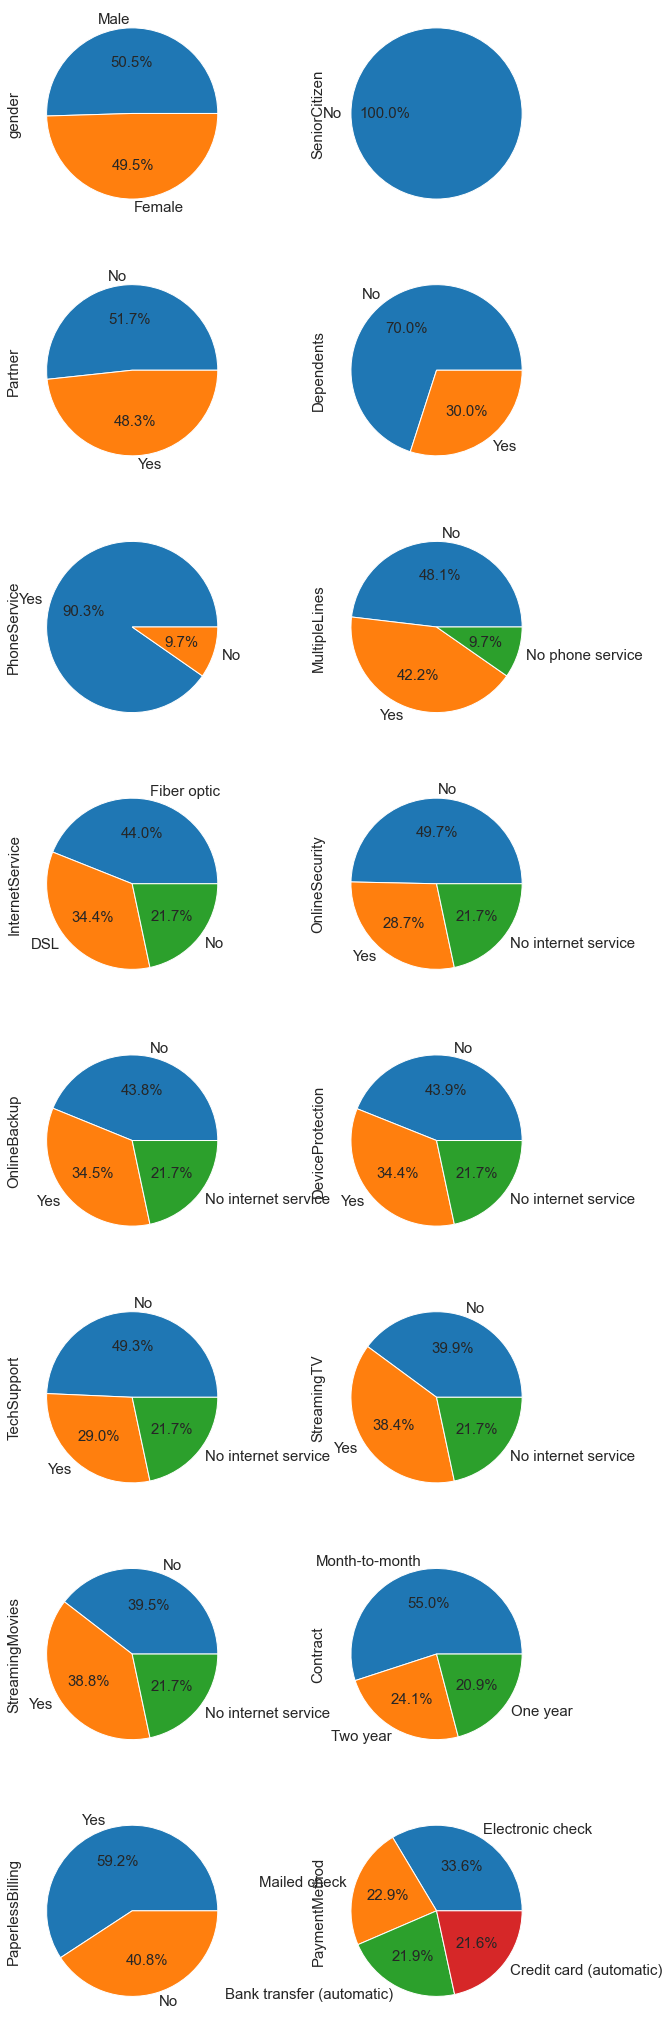

In [97]:
srt_dist()

Dari grafik diatas kita bisa menarik kesimpulan bahwa kebanyakan customer masih muda dan hanya berkisar 30% yang dependent serta 10% dari mereka tidak memiliki phone service. Korelasi dari variabel ini dapat diragukan

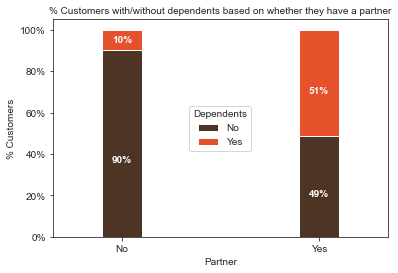

In [98]:
import matplotlib.ticker as mtick
colors = ['#4D3425','#E4512B']
partner_dependents = df.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (6,4),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':10},title = 'Dependents',fontsize =10)
ax.set_ylabel('% Customers',size = 10)
ax.set_title('% Customers with/without dependents based on whether they have a partner',size = 10)
ax.xaxis.label.set_size(10)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 10)

Dari asumsi sebelumnya ternyata sesuai bahwa lebih banyak customer yang tidak memiliki pasangan yang juga tidak memiliki tanggungan/dependent

Text(0.5, 1.0, '# of Customers by their tenure')

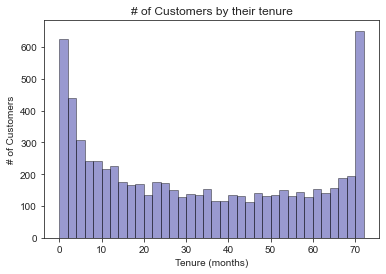

In [99]:
ax = sns.distplot(df['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

Text(0.5, 1.0, 'Two Year Contract')

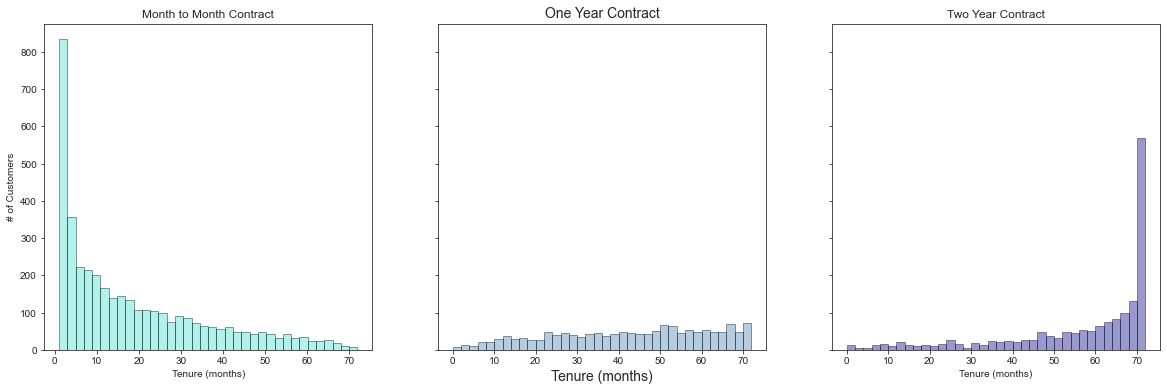

In [100]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(df[df['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(df[df['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(df[df['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

Dari grafik diatas dapat kita lihat bahwa tenor kontrak bulan ke bulan selanjutnya lebih rendah dibandingkan dengan pelanggan berkontrak 2 tahun

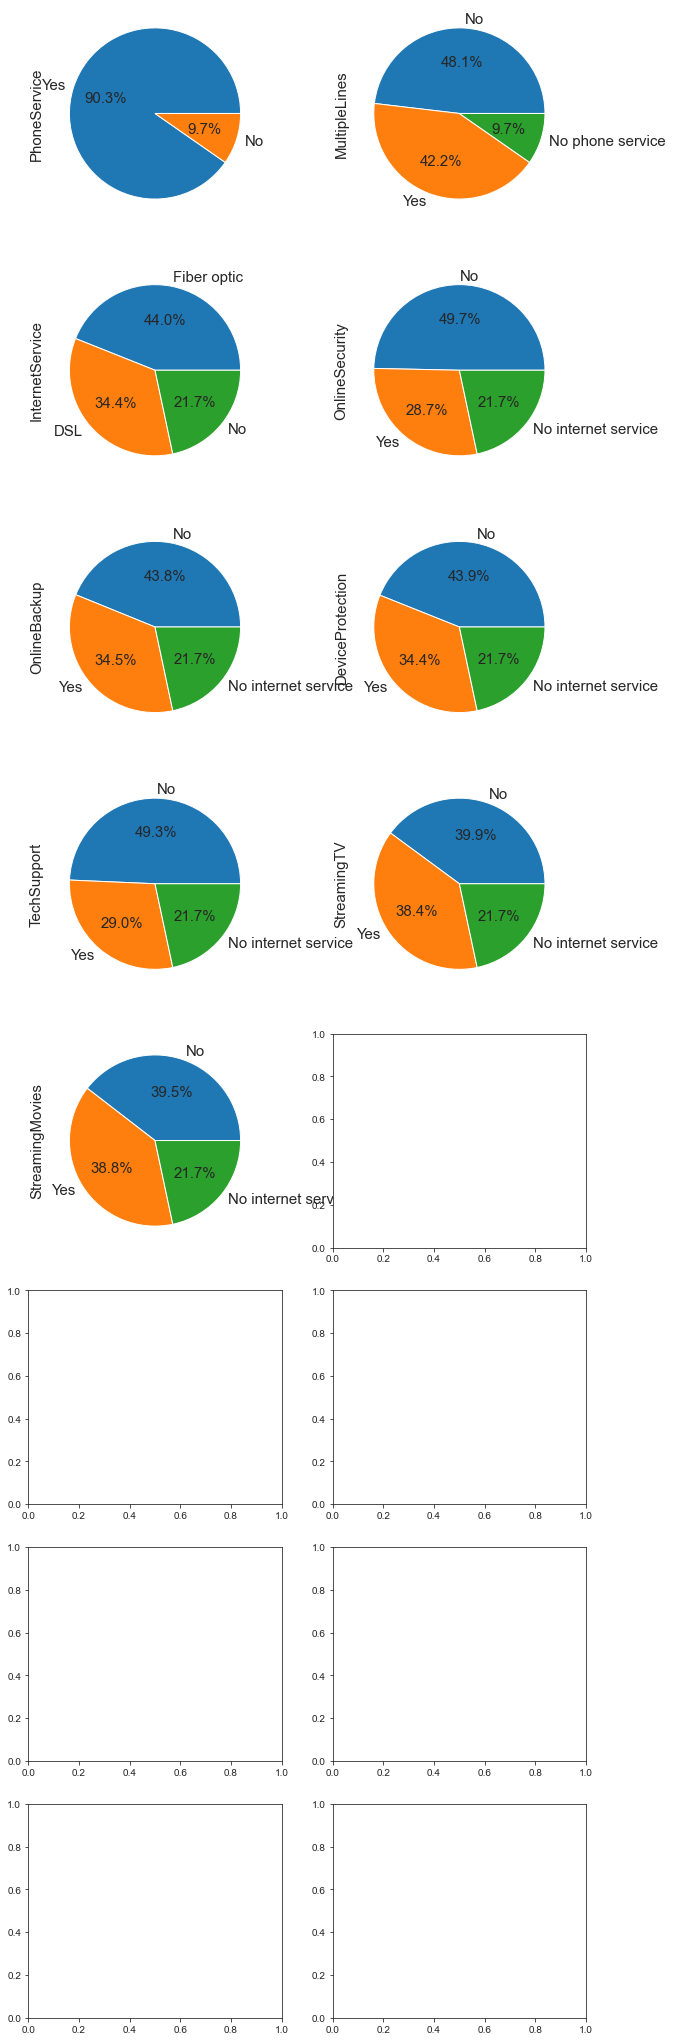

In [101]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

srt_dist(df,services)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

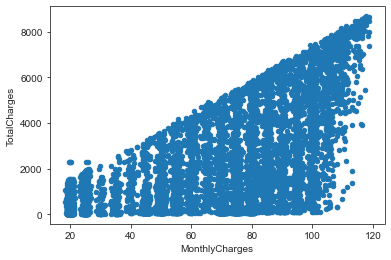

In [102]:
df[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',y='TotalCharges')

<AxesSubplot:ylabel='Churn'>

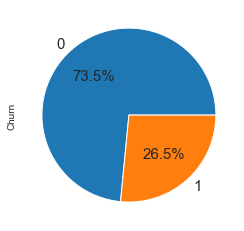

In [103]:
(df['Churn'].value_counts()*100.0 /len(df)).plot.pie(autopct='%.1f%%', fontsize =15)

Tingkat churn yang tinggi dapat dilihat dari grafik diatas yaitu yang orang dengan tingkat tenure/masa kerja yang rendah dan biaya bulanan yang lebih tinggi. Kemudian kontrak yang perbulan dan internet fiber optic memiliki efek yang cukup signifikan dengan kemungkinan 'churn'

fitur yang berkorelasi tinggi dengan fitur Churn seperti no-partner / dependent, no tech support, dll. dapat dilihat pada grafik dibawah ini

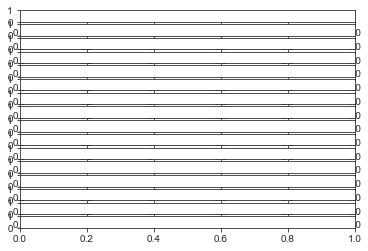

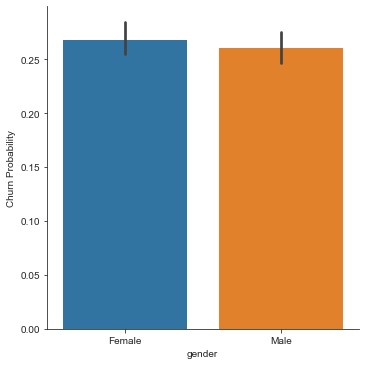

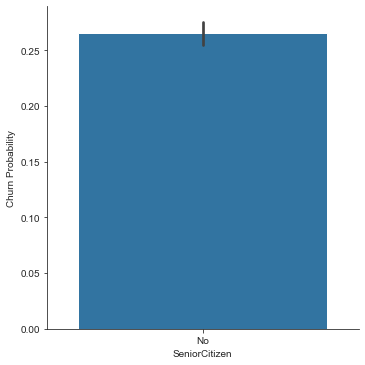

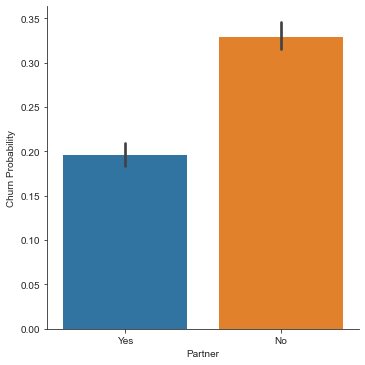

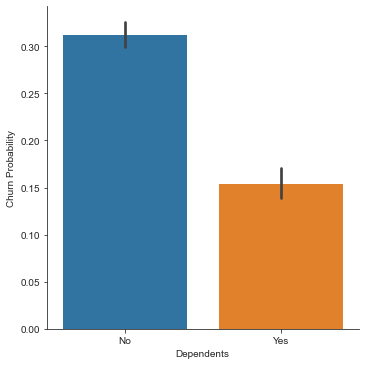

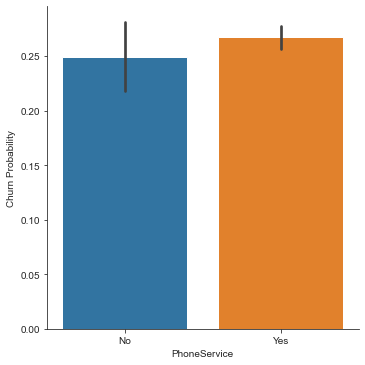

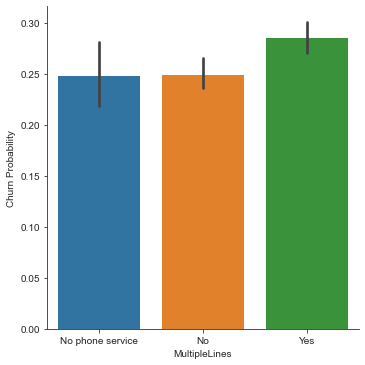

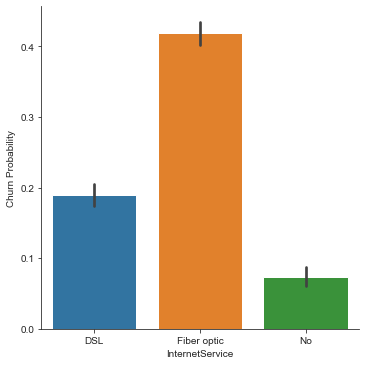

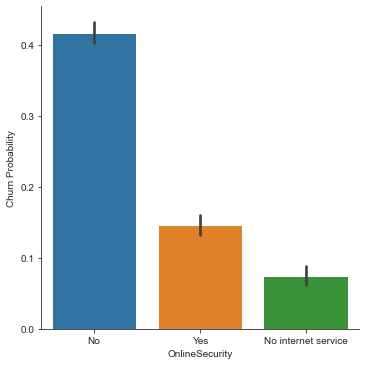

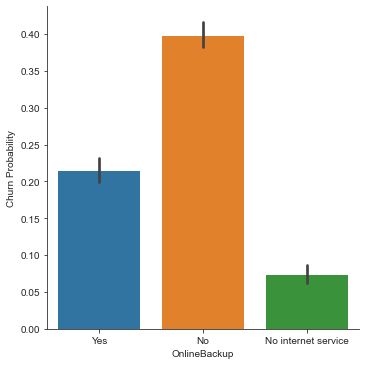

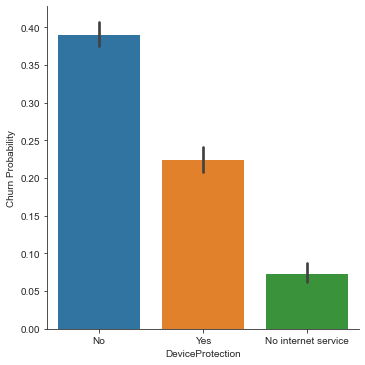

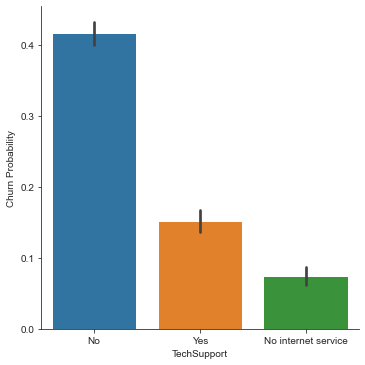

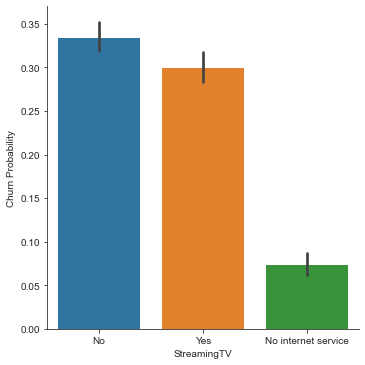

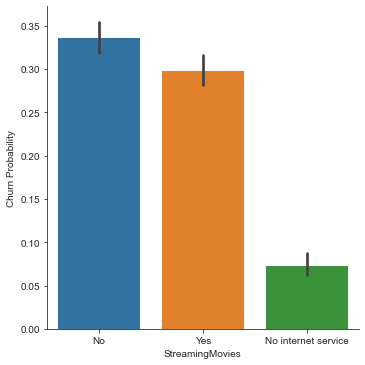

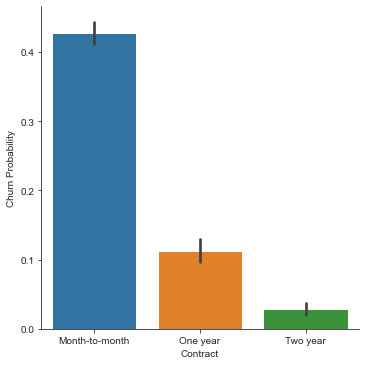

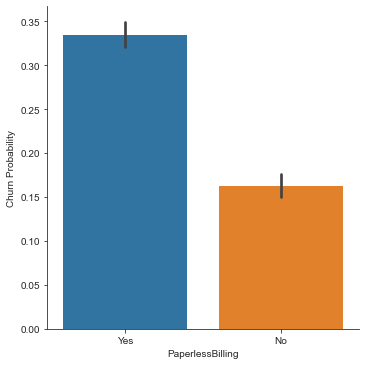

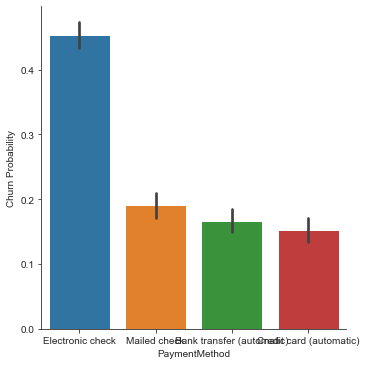

In [104]:
cat_feats=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod']
fig,axes = plt.subplots(16)
axes = axes.flatten()

for i, j in zip(cat_feats, axes):

    sortd = df.groupby([i])['Churn'].median().sort_values(ascending=False)
    j=sns.catplot(x=i,
                y='Churn',
                data=df,
                kind='bar')
    j.set_ylabels("Churn Probability")

### Data Preprocessing

In [26]:
le = LabelEncoder()

cat_col['gender'] = le.fit_transform(cat_col['gender'])
cat_col['SeniorCitizen'] = le.fit_transform(cat_col['SeniorCitizen'])
cat_col['Partner'] = le.fit_transform(cat_col['Partner'])
cat_col['Dependents'] = le.fit_transform(cat_col['Dependents'])
cat_col['PhoneService'] = le.fit_transform(cat_col['PhoneService'])
cat_col['MultipleLines'] = le.fit_transform(cat_col['MultipleLines'])
cat_col['InternetService'] = le.fit_transform(cat_col['InternetService'])
cat_col['OnlineSecurity'] = le.fit_transform(cat_col['OnlineSecurity'])
cat_col['OnlineBackup'] = le.fit_transform(cat_col['OnlineBackup'])
cat_col['DeviceProtection'] = le.fit_transform(cat_col['DeviceProtection'])
cat_col['TechSupport'] = le.fit_transform(cat_col['TechSupport'])
cat_col['StreamingTV'] = le.fit_transform(cat_col['StreamingTV'])
cat_col['StreamingMovies'] = le.fit_transform(cat_col['StreamingMovies'])
cat_col['Contract'] = le.fit_transform(cat_col['Contract'])
cat_col['PaperlessBilling'] = le.fit_transform(cat_col['PaperlessBilling'])
cat_col['PaymentMethod'] = le.fit_transform(cat_col['PaymentMethod'])
cat_col['Churn'] = le.fit_transform(cat_col['Churn'])

In [27]:
cat_col.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [28]:
num_col.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [30]:
X=pd.concat([num_col, cat_col.drop(columns=['Churn'])],axis=1).reset_index(drop=True)
y=cat_col.Churn

In [31]:
#split data into 3 data for training and validation, and hold 1 group data for testing in the end

#train=70%
#validation=15%
#holdouttest=15%

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [33]:
X_validation,X_holdouttest,y_validation,y_holdouttest = train_test_split(X_test,y_test,test_size=0.5,random_state=42)

In [34]:
print(len(X),len(X_train),len(X_validation),len(X_holdouttest))

7043 4930 1056 1057


In [35]:
# pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipe = Pipeline([("scaler", StandardScaler())])

In [36]:
X_tr_std = pipe.fit_transform(X_train)
X_val_std = pipe.transform(X_validation)
X_test_std = pipe.transform(X_holdouttest)

### Model Definition and Training

In [39]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [40]:

model_seq = keras.Sequential([
    keras.layers.Dense(11, activation="relu",kernel_initializer=keras.initializers.GlorotUniform, input_shape=X_tr_std.shape[1:]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(2, activation='sigmoid')
])

In [41]:
model_seq.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 11)                220       
_________________________________________________________________
batch_normalization (BatchNo (None, 11)                44        
_________________________________________________________________
dense_1 (Dense)              (None, 300)               3600      
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1

In [42]:
model_seq.compile(loss=keras.losses.sparse_categorical_crossentropy,
                  optimizer=keras.optimizers.Adam(learning_rate=0.0001),
                  metrics=[keras.metrics.sparse_categorical_accuracy])

In [43]:
%time history_seq = model_seq.fit(X_tr_std,y_train,epochs=100,validation_data=(X_val_std, y_validation),verbose=0)

Wall time: 28.9 s


functional API

In [44]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [45]:
input_ = keras.layers.Input(shape=X_tr_std.shape[1:])
hidden1 = keras.layers.Dense(11, kernel_initializer=keras.initializers.GlorotUniform, activation="relu")(input_)
keras.layers.BatchNormalization(),
hidden2 = keras.layers.Dense(300, activation="relu")(hidden1)
keras.layers.BatchNormalization(),
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model_func = keras.models.Model(inputs=[input_], outputs=[output])

In [46]:
model_func.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 19)]         0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 11)           220         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 300)          3600        dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 319)          0           input_1[0][0]                    
                                                                 dense_1[0][0]                

In [49]:
model_func.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              metrics=[keras.metrics.sparse_categorical_accuracy])

In [52]:
%time history_func = model_func.fit(X_tr_std,y_train,epochs=100,validation_data=(X_val_std, y_validation),verbose=0)

Wall time: 16.8 s


### Model Evaluation

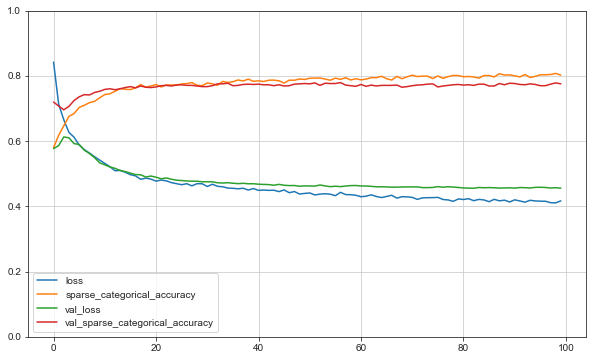

In [53]:
#Seq API
pd.DataFrame(history_seq.history).plot(figsize=(10, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

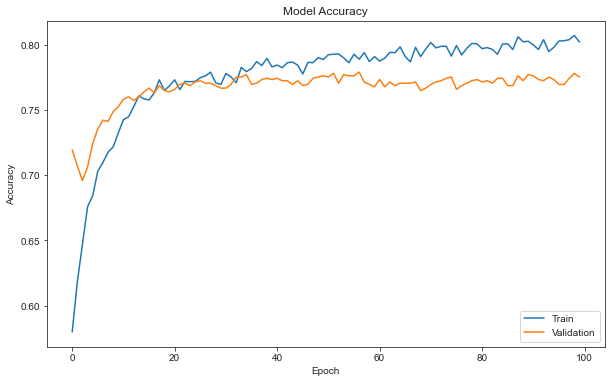

In [54]:
plt.figure(figsize=(10, 6))  
plt.plot(history_seq.history['sparse_categorical_accuracy'])
plt.plot(history_seq.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

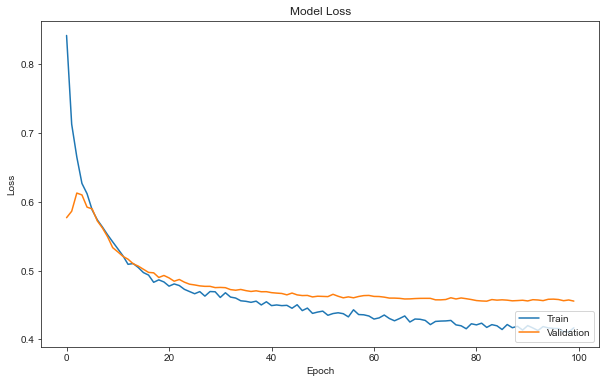

In [55]:
# summarize history for loss
plt.figure(figsize=(10, 6))  
plt.plot(history_seq.history['loss'])
plt.plot(history_seq.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [57]:
test_loss, test_acc = model_seq.evaluate(X_val_std,  y_validation, verbose=2)

33/33 - 0s - loss: 0.4556 - sparse_categorical_accuracy: 0.7756


In [58]:
pred_train = model_seq.predict(X_tr_std)
scores = model_seq.evaluate(X_tr_std, y_train)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))

155/155 [==============================] - 0s 1ms/step - loss: 0.3776 - sparse_categorical_accuracy: 0.8260
Accuracy on training data: 0.8259634971618652% 
 Error on training data: 0.17403650283813477


In [59]:
pred_val = model_seq.predict(X_val_std)
scores = model_seq.evaluate(X_val_std, y_validation)
print('Accuracy on validation data: {}% \n Error on testing data: {}'.format(scores[1], 1 - scores[1]))

33/33 [==============================] - 0s 1ms/step - loss: 0.4556 - sparse_categorical_accuracy: 0.7756
Accuracy on testing data: 0.7755681872367859% 
 Error on testing data: 0.2244318127632141


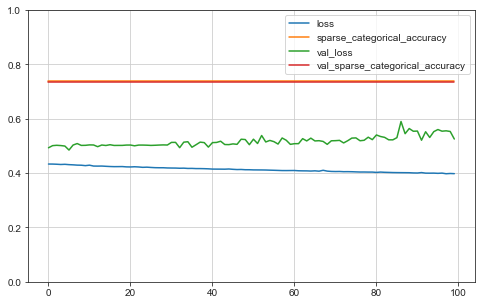

In [60]:
#2.func API
pd.DataFrame(history_func.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [61]:
%time model_func.evaluate(X_val_std, y_validation)

33/33 [==============================] - 0s 810us/step - loss: 0.5253 - sparse_categorical_accuracy: 0.7367
Wall time: 62.8 ms


[0.5252917408943176, 0.7367424368858337]

##### Model Improvement

_sequential API_

In [66]:
keras.backend.clear_session()
np.random.seed(77)
tf.random.set_seed(77)

In [67]:
model_seq.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.Adamax(learning_rate=0.0001),
              metrics=[keras.metrics.sparse_categorical_accuracy])

In [107]:
pred_val = model_seq.predict(X_test_std)
scores = model_seq.evaluate(X_test_std, y_holdouttest)
print('Accuracy on testing data: {}% \n Error on testing data: {}'.format(scores[1], 1 - scores[1]))

34/34 [==============================] - 0s 1ms/step - loss: 0.4694 - sparse_categorical_accuracy: 0.7635
Accuracy on testing data: 0.7634815573692322% 
 Error on testing data: 0.23651844263076782


In [109]:
%time model_seq.evaluate(X_test_std, y_holdouttest)

34/34 [==============================] - 0s 1ms/step - loss: 0.4694 - sparse_categorical_accuracy: 0.7635
Wall time: 77.8 ms


[0.4693607985973358, 0.7634815573692322]

_functional API_

In [68]:
keras.backend.clear_session()
np.random.seed(77)
tf.random.set_seed(77)

In [69]:
model_func.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adamax(learning_rate=0.0001),
              metrics=[keras.metrics.sparse_categorical_accuracy])

In [110]:
pred_val = model_func.predict(X_test_std)
scores = model_func.evaluate(X_test_std, y_holdouttest)
print('Accuracy on testing data: {}% \n Error on testing data: {}'.format(scores[1], 1 - scores[1]))

34/34 [==============================] - 0s 849us/step - loss: 0.5578 - sparse_categorical_accuracy: 0.7200
Accuracy on testing data: 0.7199621796607971% 
 Error on testing data: 0.2800378203392029


In [111]:
%time model_func.evaluate(X_test_std, y_holdouttest)

34/34 [==============================] - 0s 786us/step - loss: 0.5578 - sparse_categorical_accuracy: 0.7200
Wall time: 67.8 ms


[0.5577895641326904, 0.7199621796607971]

##### Model Inference

In [129]:
y_pred = model_seq.predict(X_test_std)
print('Predict result: \n', y_pred[:5])
print('\n y_test: \n', y_test[:5])

Predict result: 
 [[0.90268826 0.17942056]
 [0.8000784  0.15670231]
 [0.67337745 0.27156663]
 [0.7085835  0.18029758]
 [0.3022982  0.6206509 ]]

 y_test: 
 185     1
2715    0
3825    0
1807    1
132     0
Name: Churn, dtype: int32


In [130]:
print(X.shape)
X.head(1)

(7043, 19)


,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,1,29.85,29.85,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2


In [131]:
dr = [[1, 20, 25, 0, 1, 1, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 1, 2]]
drf = pd.DataFrame(dr)

In [132]:
drf.rename(columns={
    0: "tenure",
    1: "MonthlyCharges",    
    2: "TotalCharges",
    3: "gender",
    4: "SeniorCitizen",
    5: "Partner",
    6: "Dependents",
    7: "PhoneService",
    8: "MultipleLines",
    9: "InternetService",
    10: "OnlineSecurity",
    11: "OnlineBackup",
    12: "DeviceProtection",
    13: "TechSupport",
    14: "StreamingTV",
    15: "StreamingMovies",
    16: "Contract",
    17: "PaperlessBilling",
    18: "PaymentMethod",
},
                inplace=True)

In [133]:
drf

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,1,20,25,0,1,1,0,0,1,1,0,2,0,0,0,0,0,1,2


In [178]:
#func API prediction
pred = model_func.predict(drf)

In [179]:
pred_funct = []
for element in pred:
    if element > 0.5:
        pred_funct.append(1)
        print('Stay')
    else:
        pred_funct.append(0)
        print("tend to leave")
print(pred_funct[0])

Stay
1


#### Model Saving

In [87]:
model_seq.save("model_sequelize.h5")

### Kesimpulan

1. Dapat dilihat Total biaya adalah fitur yang paling penting. Alasan nomor satu pelanggan akan 'churn' jika mereka menganggap layanan itu mahal atau tidak terjangkau. 
2. Tenure juga penting, pelanggan yang telah menggunakan layanan untuk waktu yang lama atau memiliki kontrak jangka panjang, yang umumnya lebih murah, akan cenderung bertahan dan tidak berhenti.
3. Sebagian besar pelanggan yang memiliki kontrak bulan ke bulan lebih cenderung berhenti. Dapat dihipotesiskan bahwa alasannya dikaitkan dengan alasan pribadi pelanggan untuk memiliki keberatan tentang kontrak jangka panjang atau biaya yang lebih tinggi per unit waktu yang dihasilkan dari kontrak bulanan.
4. Fitur yang kurang penting adalah jenis kelamin, dependents, partner, streaming TV, backup dan device protection.
5. Dari model ANN yang dibuat dapat dilihat hasilnya yang kurang memuaskan untuk dataset ini walaupun sudah berjalan dengan cukup baik dan singkat.
6. Sequential API memiliki performa yang lebih baik dari functional API.
7. Penggunaan Relu dan Sigmoid cocok untuk dataset ini karena hanya 2 class saja.

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))